# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Prepare the data analysis</a>  
 - <a href='#21'>importing and loading libraries and packages</a>  
 - <a href='#22'>Load the data</a>   
- <a href='#3'>Data exploration</a>   
 - <a href='#31'>Check for missing data</a>  
 - <a href='#35'>Multiple features visualization</a>   
- <a href='#4'>Feature engineering</a>
 - <a href='#36'>Imputation of missing data</a>   


# 🚜 Predicting the Sales Price of Bulldozers using Machine Learning

### 1. Problem Statement

> How well can we predict the future sale price of a bulldozer given its characteristics and previous examples of how much similar bulldozers have been sold for?

### 2. Data
> Data is from Kaggle Blue book for Bulldozers competition : https://www.kaggle.com/c/bluebook-for-bulldozers/data

+ For this competition, you are predicting the sale price of bulldozers sold at auctions.
  The data for this competition is split into three parts:
  
  Train.csv is the training set, which contains data through the end of 2011.
  
  Valid.csv is the validation set, which contains data from January 1, 2012 - April 30,
  2012 You make predictions on this set throughout the majority of the competition. Your   
  score on this set is used to create the public leaderboard.

  Test.csv is the test set, which won't be released until the last week of the     
  competition. It contains data from May 1, 2012 - November 2012. Your score on the test   
  set determines your final rank for the competition.

### 3. Evaluation
The evaluation metric for this competetion is the RMSLE (Root Mean Squared Log Error) between the actual data and the predicted auction prices as suggested by the competition.

For more on the evaluation of this project check:
https://www.kaggle.com/c/bluebook-for-bulldozers/data

**Note:**  The goal for the regression evaluation metrics is to minimise the error.

### Our Goal:
The goal of this project is to reduce build a machine learning model to minimise RMSLE.


### 4. Features
The features of this project have been added in this google sheets 
https://docs.google.com/spreadsheets/d/1piF-oStjA4MBd8BGYiBd4nScBchpnaE9ZHNk5kUHuZ8/edit?usp=sharing






# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("seaborn")

import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode , iplot , plot
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()

import warnings
warnings.simplefilter(action = "ignore" , category = FutureWarning)
import statsmodels.formula.api as smf
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
from scipy import stats
import scipy

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold
from sklearn.metrics import r2_score
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

import warnings
warnings.filterwarnings('ignore')

# load notebooks

In [3]:
# Import training and validation sets
df = pd.read_csv("./TrainAndValid.csv" , low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check the shape of the DataFrame
print('Bulldozer Data - rows:' , df.shape[0],'columns:', df.shape[1])

Bulldozer Data - rows: 412698 columns: 53


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [7]:
# Checking for missing values
missingInfo = list(df.columns[df.isnull().any()])
missingInfo

['auctioneerID',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

# Printing how many missing values each column has.

In [8]:
for col in missingInfo:
    missingNumber = df[df[col].isnull() == True].shape[0]
    print('Missing Number for Col {}: {}'.format(col , missingNumber))

Missing Number for Col auctioneerID: 20136
Missing Number for Col MachineHoursCurrentMeter: 265194
Missing Number for Col UsageBand: 339028
Missing Number for Col fiSecondaryDesc: 140727
Missing Number for Col fiModelSeries: 354031
Missing Number for Col fiModelDescriptor: 337882
Missing Number for Col ProductSize: 216605
Missing Number for Col Drive_System: 305611
Missing Number for Col Enclosure: 334
Missing Number for Col Forks: 214983
Missing Number for Col Pad_Type: 331602
Missing Number for Col Ride_Control: 259970
Missing Number for Col Stick: 331602
Missing Number for Col Transmission: 224691
Missing Number for Col Turbocharged: 331602
Missing Number for Col Blade_Extension: 386715
Missing Number for Col Blade_Width: 386715
Missing Number for Col Enclosure_Type: 386715
Missing Number for Col Engine_Horsepower: 386715
Missing Number for Col Hydraulics: 82565
Missing Number for Col Pushblock: 386715
Missing Number for Col Ripper: 305753
Missing Number for Col Scarifier: 386704
Mi

# Checking Percentage of missing values in the DF

In [9]:
# Percentage of missing values in dataframe

for col in missingInfo:
    percentMissing = df[df[col].isnull() == True].shape[0] / df.shape[0]
    print('Col Percent Missing {}: {}'.format(col, percentMissing))    

Col Percent Missing auctioneerID: 0.04879112571420264
Col Percent Missing MachineHoursCurrentMeter: 0.6425861041245656
Col Percent Missing UsageBand: 0.8214917445686677
Col Percent Missing fiSecondaryDesc: 0.3409926871465333
Col Percent Missing fiModelSeries: 0.8578452039990502
Col Percent Missing fiModelDescriptor: 0.8187148956379725
Col Percent Missing ProductSize: 0.5248511017741787
Col Percent Missing Drive_System: 0.7405197020581636
Col Percent Missing Enclosure: 0.0008093085016161939
Col Percent Missing Forks: 0.5209208670747132
Col Percent Missing Pad_Type: 0.8034979573441112
Col Percent Missing Ride_Control: 0.6299279376202453
Col Percent Missing Stick: 0.8034979573441112
Col Percent Missing Transmission: 0.5444441213671983
Col Percent Missing Turbocharged: 0.8034979573441112
Col Percent Missing Blade_Extension: 0.9370411293488217
Col Percent Missing Blade_Width: 0.9370411293488217
Col Percent Missing Enclosure_Type: 0.9370411293488217
Col Percent Missing Engine_Horsepower: 0.9

In [ ]:
# Dealing with date

In [10]:
df["saledate"]

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

In [11]:
df["saledate"].dtypes

dtype('O')

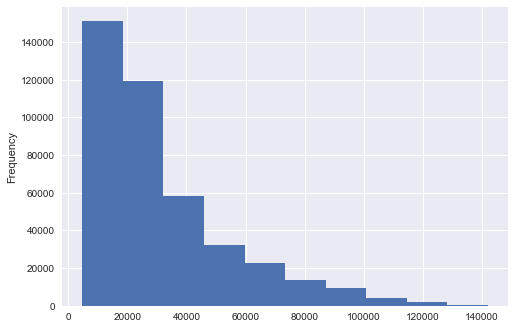

In [14]:
# checking the distribution of dates
df.SalePrice.plot.hist();

# Observations:
+ Date is rightly skewed or skewed to the right , hence not normally distributed

+ Decision:
    * Parse datetime to convert date from object to datetime object

# Dealing with Dates - Parsing Dates
+ When working timeseries data , we want to enrich the time % date component as much as
  possible.
  We can do that by using pandas which of our columns has dates in it using the `parse_dates parameters`

In [16]:
df_new = pd.read_csv("./TrainAndValid.csv" , low_memory=False, 
                parse_dates=["saledate"])
df_new.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Check data type of date
df_new.saledate.dtype

dtype('<M8[ns]')

In [18]:
df_new.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

# Sorting Dataframe by SaleDate
+ When working with time series data its a good idea to sort data by date